In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [21]:
# Importing data

path = r'C:\Users\nodnarb\Documents\IC Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_w_flags.pkl'))

#### Bar chart

<Axes: xlabel='orders_day_of_week'>

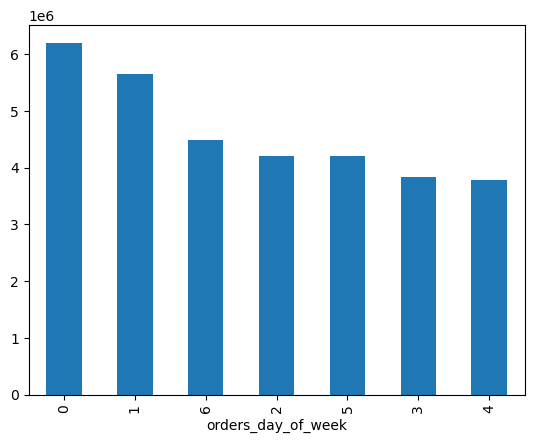

In [22]:
# Bar chart for orders day of week

df['orders_day_of_week'].value_counts().plot.bar()

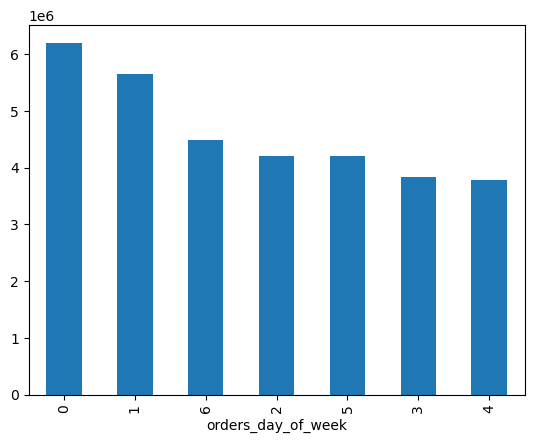

In [5]:
bar = df['orders_day_of_week'].value_counts().plot.bar()

In [6]:
# Exporting bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

#### Histogram

<Axes: ylabel='Frequency'>

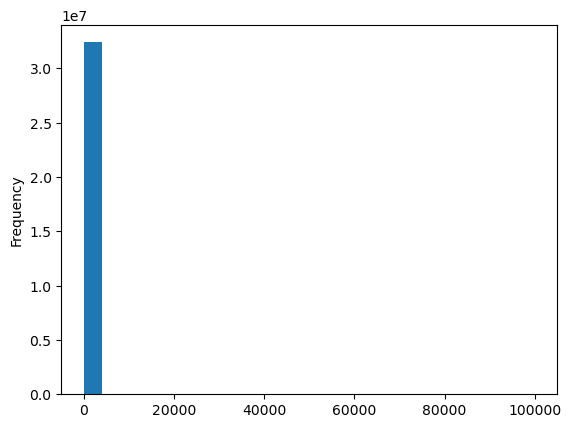

In [8]:
# Histogram for prices

df['prices'].plot.hist(bins = 25)

#### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

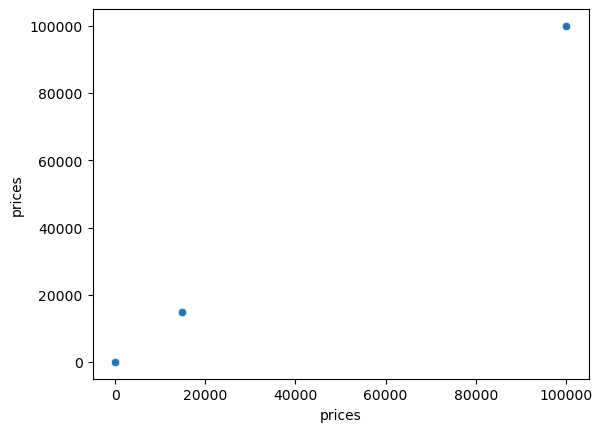

In [10]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

#### ---------------------------------------------------------

In [25]:
# Quality check

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,busiest_day,busiest_times,max_orders,loyalty_flag,average_spending,spending_flag,median_days_of_prior_order,frequency_flag
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Most orders,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,25,Regular customer,170.073770,High spender,12.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Slowest days,Fewest orders,25,Regular customer,170.073770,High spender,12.0,Regular customer
32380527,1916142,206049,1,2,17,0.0,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,5,New customer,938.031250,High spender,7.0,Frequent customer


In [29]:
# Remove outlier values

df.loc[df['prices'] > 100, 'prices'] = np.nan

In [31]:
df['prices'].max()

25.0

#### Histogram

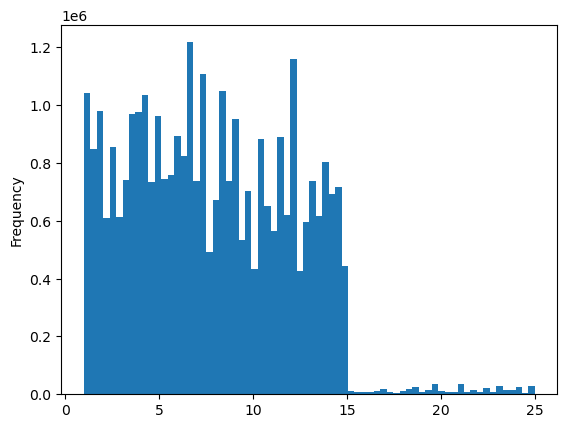

In [42]:
hist = df['prices'].plot.hist(bins = 70)

In [44]:
# Exporting histogram

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

#### Sampling

In [58]:
# Create a list holding true/false values to the test
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [52]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [60]:
# Splitting into big (70%) and small (30%) samples

big = df[dev]
small = df[~dev]

In [62]:
# Quality check

len(df)

32404859

In [64]:
len(big) + len(small)

32404859

In [66]:
# Creating smaller dataframe

df_2 = small[['orders_day_of_week', 'prices']]

#### Line chart

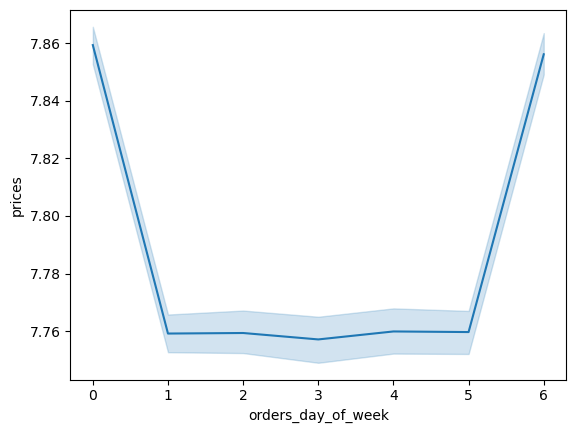

In [73]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [75]:
# Exporting line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_vs_day_of_week.png'))